# Пастухов Евгений, РТ5-61Б

In [1]:
import numpy as np
import pandas as pd
dc = pd.read_csv('C:\\dc-wikia-data.csv')

In [2]:
dc.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
0,1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3093.0,"1939, May",1939.0
1,23387,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2496.0,"1986, October",1986.0
2,1458,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,1565.0,"1959, October",1959.0
3,1659,James Gordon (New Earth),\/wiki\/James_Gordon_(New_Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,NaN,Living Characters,1316.0,"1987, February",1987.0
4,1576,Richard Grayson (New Earth),\/wiki\/Richard_Grayson_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,1237.0,"1940, April",1940.0


In [3]:
dc.shape

(6896, 13)

Уберём колонки с айди, именем и URL-ом.

In [4]:
dc = dc.drop(['page_id','name','urlslug'], axis=1)

In [5]:
dc.head()

,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
0,Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3093.0,"1939, May",1939.0
1,Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2496.0,"1986, October",1986.0
2,Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,1565.0,"1959, October",1959.0
3,Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,NaN,Living Characters,1316.0,"1987, February",1987.0
4,Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,1237.0,"1940, April",1940.0


In [6]:
dc.isnull().sum()

ID                  2013
ALIGN                601
EYE                 3628
HAIR                2274
SEX                  125
GSM                 6832
ALIVE                  3
APPEARANCES          355
FIRST APPEARANCE      69
YEAR                  69
dtype: int64

In [7]:
dc['ALIGN'].unique()

array(['Good Characters', 'Bad Characters', 'Neutral Characters', nan,
       'Reformed Criminals'], dtype=object)

In [8]:
dc['ID'].unique()

array(['Secret Identity', 'Public Identity', nan, 'Identity Unknown'],
      dtype=object)

Проверим пропуски.

In [9]:
dc.isnull().sum()

ID                  2013
ALIGN                601
EYE                 3628
HAIR                2274
SEX                  125
GSM                 6832
ALIVE                  3
APPEARANCES          355
FIRST APPEARANCE      69
YEAR                  69
dtype: int64

Уберём колонки с слишком большим числом пропусков: EYE, GSM, ID, HAIR.

In [10]:
dc = dc.drop(['ID', 'EYE', 'GSM', 'HAIR'], axis=1)

In [11]:
dc.head()

,ALIGN,SEX,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
0,Good Characters,Male Characters,Living Characters,3093.0,"1939, May",1939.0
1,Good Characters,Male Characters,Living Characters,2496.0,"1986, October",1986.0
2,Good Characters,Male Characters,Living Characters,1565.0,"1959, October",1959.0
3,Good Characters,Male Characters,Living Characters,1316.0,"1987, February",1987.0
4,Good Characters,Male Characters,Living Characters,1237.0,"1940, April",1940.0


In [12]:
dc['SEX'].unique()

array(['Male Characters', 'Female Characters', nan,
       'Genderless Characters', 'Transgender Characters'], dtype=object)

In [13]:
dc['ALIVE'].unique()

array(['Living Characters', 'Deceased Characters', nan], dtype=object)

In [14]:
dc['ALIGN'].unique()

array(['Good Characters', 'Bad Characters', 'Neutral Characters', nan,
       'Reformed Criminals'], dtype=object)

Также уберём категориальную колонку с месяцем и годом первого появления FIRST APPEARANCE.

In [15]:
dc = dc.drop('FIRST APPEARANCE', axis=1)

In [16]:
dc.head()

,ALIGN,SEX,ALIVE,APPEARANCES,YEAR
0,Good Characters,Male Characters,Living Characters,3093.0,1939.0
1,Good Characters,Male Characters,Living Characters,2496.0,1986.0
2,Good Characters,Male Characters,Living Characters,1565.0,1959.0
3,Good Characters,Male Characters,Living Characters,1316.0,1987.0
4,Good Characters,Male Characters,Living Characters,1237.0,1940.0


Будем предсказывать, на какой стороне герой (признак ALIGN).

Уберём все строчки, в которых пропущены значения в ALIGN.

In [17]:
dc.dropna(axis=0, subset=['ALIGN'], inplace=True)

In [18]:
dc.shape

(6295, 5)

In [19]:
X = dc.drop('ALIGN', axis=1)

In [20]:
y = dc.ALIGN

Проведём предобработку данных.

### Заполнение пропусков

In [21]:
X.isnull().sum()

SEX            100
ALIVE            2
APPEARANCES    320
YEAR            61
dtype: int64

В оставшихся колонках довольно небольшое количество пропусков, так что просто импьютируем наиболее частое значение.

In [22]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [23]:
for col in X.columns:
    X[col] = imputer.fit_transform(X[[col]])

In [24]:
X.isnull().any()

SEX            False
ALIVE          False
APPEARANCES    False
YEAR           False
dtype: bool

#### Кодирование категориальных признаков

In [25]:
X = pd.get_dummies(X)

#### Масштабирование числовых признаков

In [26]:
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()

X['APPEARANCES'] = minmax_scaler.fit_transform(X[['APPEARANCES']])
X['YEAR'] = minmax_scaler.fit_transform(X[['YEAR']])

X.head()

,APPEARANCES,YEAR,SEX_Female Characters,SEX_Genderless Characters,SEX_Male Characters,SEX_Transgender Characters,ALIVE_Deceased Characters,ALIVE_Living Characters
0,1.000000,0.038961,0,0,1,0,0,1
1,0.806921,0.649351,0,0,1,0,0,1
2,0.505821,0.298701,0,0,1,0,0,1
3,0.425291,0.662338,0,0,1,0,0,1
4,0.399741,0.051948,0,0,1,0,0,1


#### Разделение на тестовую и обучающую выборки

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Обучение моделей

### Decision Trees

In [28]:
from sklearn.tree import DecisionTreeClassifier
tree_cl = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=1)
tree_cl.fit(X_train, y_train)
tree_cl_predicted = tree_cl.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, tree_cl_predicted)

0.5762388818297332

In [30]:
feature_importance = tree_cl.feature_importances_.tolist()
for i in range(len(feature_importance)):
    print("{:<30} {:<8}".format(X.columns.values[i], feature_importance[i]))

APPEARANCES                    0.5392839014060052
YEAR                           0.263228422673696
SEX_Female Characters          0.11436030907043437
SEX_Genderless Characters      0.0     
SEX_Male Characters            0.04311748964587242
SEX_Transgender Characters     0.0     
ALIVE_Deceased Characters      0.04000987720399201
ALIVE_Living Characters        0.0     


Качество предсказания, как можно заметить, довольно слабенькое.

При этом классификатор определил в качестве самого значимого признака число появлений - APPEARANCES (почти 54%).

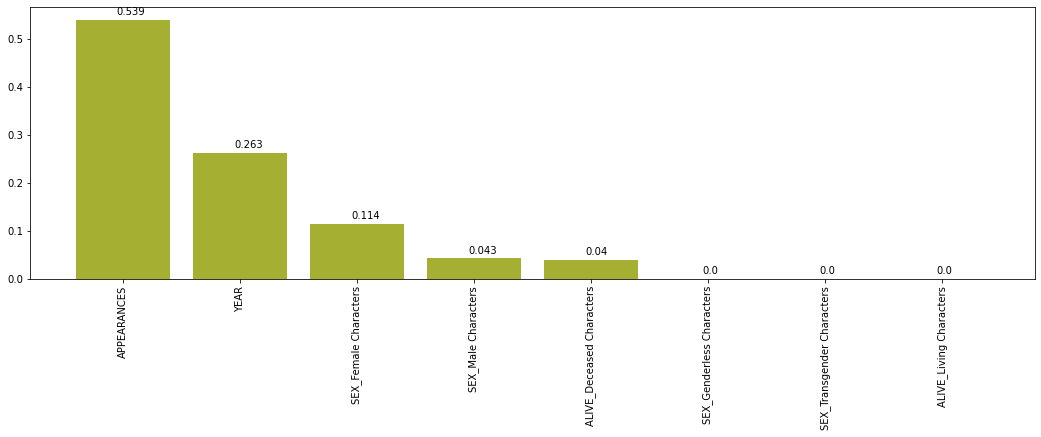

In [31]:
from operator import itemgetter
import matplotlib.pyplot as plt

# код из лекции
def draw_feature_importances(tree_model, X_dataset, figsize=(18,5)):
    # Сортировка значений важности признаков по убыванию
    list_to_sort = list(zip(X_dataset.columns.values, tree_model.feature_importances_))
    sorted_list = sorted(list_to_sort, key=itemgetter(1), reverse = True)
    # Названия признаков
    labels = [x for x,_ in sorted_list]
    # Важности признаков
    data = [x for _,x in sorted_list]
    # Вывод графика
    fig, ax = plt.subplots(figsize=figsize)
    ind = np.arange(len(labels))
    plt.bar(ind, data, color='#a5af32')
    plt.xticks(ind, labels, rotation='vertical')
    # Вывод значений
    for a,b in zip(ind, data):
        plt.text(a-0.05, b+0.01, str(round(b,3)))
    plt.show()
    return labels, data

tree_cl_fl, tree_cl_fd = draw_feature_importances(tree_cl, X)

### Градиентный бустинг

In [32]:
from catboost import CatBoostClassifier, Pool
test_data = catboost_pool = Pool(X_train, y_train)

model = CatBoostClassifier(iterations=2,
                           depth=2,
                           learning_rate=1,
                           verbose=True)

In [33]:
model.fit(X_train, y_train)

0:	learn: 0.9829475	total: 65.5ms	remaining: 65.5ms
1:	learn: 0.9276914	total: 69.8ms	remaining: 0us


In [34]:
preds_class = model.predict(test_data)

In [35]:
type(preds_class)

numpy.ndarray

In [36]:
type(y_test)

pandas.core.series.Series

In [38]:
preds_class

array([['Bad Characters'],
       ['Bad Characters'],
       ['Bad Characters'],
       ...,
       ['Bad Characters'],
       ['Bad Characters'],
       ['Good Characters']], dtype=object)

In [39]:
predictions = pd.Series([preds_class])

In [ ]:
accuracy_score(y_test, predictions)